## Sentiment Analysis 

In [12]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [13]:
df = pd.read_csv('MMTAllReviews1.csv')
df

,Unnamed: 0,Review,Rating
0,1,"I booked a room in Bay laurel hotel, faridabad...",1
1,2,In trip gaurantee you will not get 3x money he...,1
2,3,"Excellent service, value for money, better exp...",5
3,4,Till time I have not received my flight cancel...,3
4,5,"Even after 5 days of ticket cancellation, I do...",1
...,...,...,...
3518,3519,I recently booked a holiday reservation from M...,5
3519,3520,It was my first visit of Somnath. I went with ...,5
3520,3521,In shrawan month I visited Somnath and choose ...,5
3521,3522,It was our first trip to maldives with my fami...,5


In [22]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt') #this  divides a text into a list of sentences by using an unsupervised algorithm
ps=PorterStemmer()
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Omkar
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Omkar
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Omkar
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"couldn\'t", "could not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
def cleaning(text):
    text = decontracted(text)
    text = text.lower()                              #lowering the text
    text = text.replace('the media could not be loaded.','')
    text = re.sub(r'#\S+','',text)                   #Remove the hyper link
    text = re.sub('[^a-z]',' ',text)              #Remove the character other than alphabet
    return text

df['cleaned'] = df['Review'].apply(cleaning)
df.head()

,Unnamed: 0,Review,Rating,cleaned
0,1,"I booked a room in Bay laurel hotel, faridabad...",1,i booked a room in bay laurel hotel faridabad...
1,2,In trip gaurantee you will not get 3x money he...,1,in trip gaurantee you will not get x money he...
2,3,"Excellent service, value for money, better exp...",5,excellent service value for money better exp...
3,4,Till time I have not received my flight cancel...,3,till time i have not received my flight cancel...
4,5,"Even after 5 days of ticket cancellation, I do...",1,even after days of ticket cancellation i do...


In [17]:
df = df[['Review','cleaned']]
df

,Review,cleaned
0,"I booked a room in Bay laurel hotel, faridabad...",i booked a room in bay laurel hotel faridabad...
1,In trip gaurantee you will not get 3x money he...,in trip gaurantee you will not get x money he...
2,"Excellent service, value for money, better exp...",excellent service value for money better exp...
3,Till time I have not received my flight cancel...,till time i have not received my flight cancel...
4,"Even after 5 days of ticket cancellation, I do...",even after days of ticket cancellation i do...
...,...,...
3518,I recently booked a holiday reservation from M...,i recently booked a holiday reservation from m...
3519,It was my first visit of Somnath. I went with ...,it was my first visit of somnath i went with ...
3520,In shrawan month I visited Somnath and choose ...,in shrawan month i visited somnath and choose ...
3521,It was our first trip to maldives with my fami...,it was our first trip to maldives with my fami...


In [18]:
from nltk.corpus import wordnet,stopwords

In [23]:
stop = stopwords.words('english')

In [24]:
df['tokenized'] = df['cleaned'].apply(word_tokenize)


In [25]:
df.sample(8)

,Review,cleaned,tokenized
2652,Have been a MMT customer for more than 10 year...,have been a mmt customer for more than year...,"[have, been, a, mmt, customer, for, more, than..."
1388,Booked a oneway cab from Noida for 23/11/17 to...,booked a oneway cab from noida for to...,"[booked, a, oneway, cab, from, noida, for, to,..."
2369,"Hey, I wanted plan for my family holidays so v...",hey i wanted plan for my family holidays so v...,"[hey, i, wanted, plan, for, my, family, holida..."
3061,I planned to go for a vacation at Kerala in t...,i planned to go for a vacation at kerala in t...,"[i, planned, to, go, for, a, vacation, at, ker..."
2559,I had very different problem with make my trip...,i had very different problem with make my trip...,"[i, had, very, different, problem, with, make,..."
1539,Make my trip has been so reliable. You will ge...,make my trip has been so reliable you will ge...,"[make, my, trip, has, been, so, reliable, you,..."
1355,I am a regular customer of Makemytrip availain...,i am a regular customer of makemytrip availain...,"[i, am, a, regular, customer, of, makemytrip, ..."
2726,Very Poor service. I have worst Experience in ...,very poor service i have worst experience in ...,"[very, poor, service, i, have, worst, experien..."


In [26]:
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop_words])


In [28]:
df.head()

,Review,cleaned,tokenized,stopwords_removed
0,"I booked a room in Bay laurel hotel, faridabad...",i booked a room in bay laurel hotel faridabad...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ..."
1,In trip gaurantee you will not get 3x money he...,in trip gaurantee you will not get x money he...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ..."
2,"Excellent service, value for money, better exp...",excellent service value for money better exp...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp..."
3,Till time I have not received my flight cancel...,till time i have not received my flight cancel...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ..."
4,"Even after 5 days of ticket cancellation, I do...",even after days of ticket cancellation i do...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,..."


In [29]:
df['joined'] = [' '.join(map(str, i)) for i in df['stopwords_removed']]
text = ' '.join(df['joined'])

In [31]:
df.head()

,Review,cleaned,tokenized,stopwords_removed,joined
0,"I booked a room in Bay laurel hotel, faridabad...",i booked a room in bay laurel hotel faridabad...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...
1,In trip gaurantee you will not get 3x money he...,in trip gaurantee you will not get x money he...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...
2,"Excellent service, value for money, better exp...",excellent service value for money better exp...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...
3,Till time I have not received my flight cancel...,till time i have not received my flight cancel...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...
4,"Even after 5 days of ticket cancellation, I do...",even after days of ticket cancellation i do...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...


## Stemming

In [32]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['stemm']=df['joined'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.iloc[:,-1]

0       book room bay laurel hotel faridabad one guest...
1       trip gaurante get x money give money wallet us...
2       excel servic valu money better experi applic o...
3       till time receiv flight cancel amount mislead ...
4       even day ticket cancel get money want money to...
                              ...                        
3518    recent book holiday reserv makemytrip travel a...
3519    first visit somnath went six famili member sur...
3520    shrawan month visit somnath choos stay pride d...
3521    first trip maldiv famili enjoy alot excel serv...
3522    visit dubai day awesom tour realli enjoy almos...
Name: stemm, Length: 3523, dtype: object

In [34]:
!pip install textblob

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 660.6 kB/s eta 0:00:01
     ----------- -------------------------- 194.6/636.8 kB 2.0 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/636.8 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 636.8/636.8 kB 3.6 MB/s eta 0:00:00


In [35]:
from textblob import Word
df['Lemmatized'] = df['stemm'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.iloc[:,-1]

0       book room bay laurel hotel faridabad one guest...
1       trip gaurante get x money give money wallet us...
2       excel servic valu money better experi applic o...
3       till time receiv flight cancel amount mislead ...
4       even day ticket cancel get money want money to...
                              ...                        
3518    recent book holiday reserv makemytrip travel a...
3519    first visit somnath went six famili member sur...
3520    shrawan month visit somnath choos stay pride d...
3521    first trip maldiv famili enjoy alot excel serv...
3522    visit dubai day awesom tour realli enjoy almos...
Name: Lemmatized, Length: 3523, dtype: object

In [36]:
df.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized
0,"I booked a room in Bay laurel hotel, faridabad...",i booked a room in bay laurel hotel faridabad...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...
1,In trip gaurantee you will not get 3x money he...,in trip gaurantee you will not get x money he...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...
2,"Excellent service, value for money, better exp...",excellent service value for money better exp...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...
3,Till time I have not received my flight cancel...,till time i have not received my flight cancel...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...
4,"Even after 5 days of ticket cancellation, I do...",even after days of ticket cancellation i do...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...


In [37]:
# #creating a user defined function for text cleaning

def text_clean(text):
    
    text=text.lower()
    
    text=re.sub("[^a-zA-Z]"," ",text)
    text=re.sub("[%s]" % re.escape(string.punctuation),"",text)
    text=re.sub("\w*\d\w*","",text)
    text=re.sub("\n","",text)
    
    return text

In [38]:
df['cleaned'] = df['Lemmatized'].apply(text_clean)
df


,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized
0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...
1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...
2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...
3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...
4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...
...,...,...,...,...,...,...,...
3518,I recently booked a holiday reservation from M...,recent book holiday reserv makemytrip travel a...,"[i, recently, booked, a, holiday, reservation,...","[recently, booked, holiday, reservation, makem...",recently booked holiday reservation makemytrip...,recent book holiday reserv makemytrip travel a...,recent book holiday reserv makemytrip travel a...
3519,It was my first visit of Somnath. I went with ...,first visit somnath went six famili member sur...,"[it, was, my, first, visit, of, somnath, i, we...","[first, visit, somnath, went, six, family, mem...",first visit somnath went six family members su...,first visit somnath went six famili member sur...,first visit somnath went six famili member sur...
3520,In shrawan month I visited Somnath and choose ...,shrawan month visit somnath choos stay pride d...,"[in, shrawan, month, i, visited, somnath, and,...","[shrawan, month, visited, somnath, choose, sta...",shrawan month visited somnath choose stay prid...,shrawan month visit somnath choos stay pride d...,shrawan month visit somnath choos stay pride d...
3521,It was our first trip to maldives with my fami...,first trip maldiv famili enjoy alot excel serv...,"[it, was, our, first, trip, to, maldives, with...","[first, trip, maldives, family, enjoyed, alot,...",first trip maldives family enjoyed alot excell...,first trip maldiv famili enjoy alot excel serv...,first trip maldiv famili enjoy alot excel serv...


In [39]:
from nltk.probability import FreqDist

In [40]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [41]:
# top 20 Bi-gram words
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(df["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(10)

,Bi-gram,Freq
0,make trip,2151
1,makemytrip com,942
2,book ticket,817
3,custom care,789
4,book hotel,608
5,custom servic,562
6,hotel book,459
7,book id,445
8,book flight,384
9,credit card,345


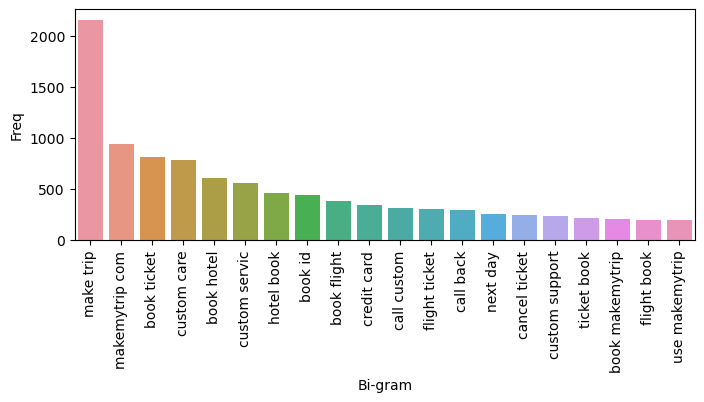

In [42]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 3))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [43]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bow = vec1.transform(corpus)
    sum_words = bow.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [44]:
top3_words = get_top_n3_words(df["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

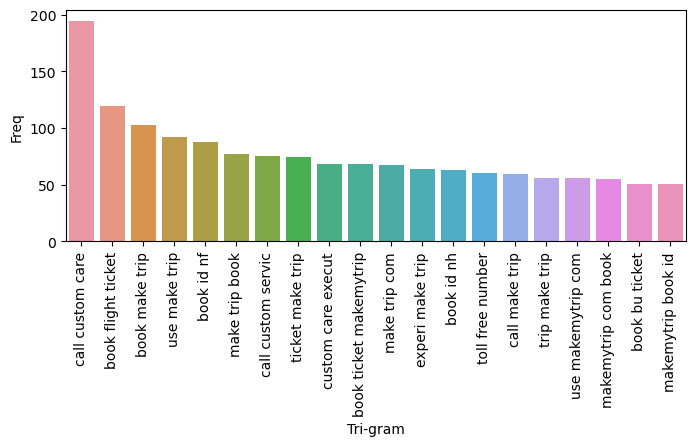

In [45]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (8, 3))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]); 

In [46]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Omkar
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Omkar
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Omkar
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
sw_nltk = stopwords.words('english')

In [48]:
sw_nltk.extend(['howev','ever','particularli','includ','end','put','stop','make','find','hotel','trafalgar','excel','would','realli','also','week','deliveriesrefus','lowandbeholdtwo','back','strand','palac','london','go','come'])

In [49]:
df['cleaned_1'] = df['cleaned'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [50]:
df['cleaned_1']=df['cleaned_1'].apply(' '.join)
df.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1
0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...,book room bay laurel faridabad one guest south...
1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...
2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...,servic valu money better experi applic one tim...
3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...
4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...


In [51]:
df1 = df
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1
0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...,book room bay laurel faridabad one guest south...
1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...
2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...,servic valu money better experi applic one tim...
3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...
4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...


## Word Cloud

In [52]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [53]:
text = ' '.join(df1['cleaned_1'])


In [63]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------------- -------------------- 143.4/300.2 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 4.7 MB/s eta 0:00:00


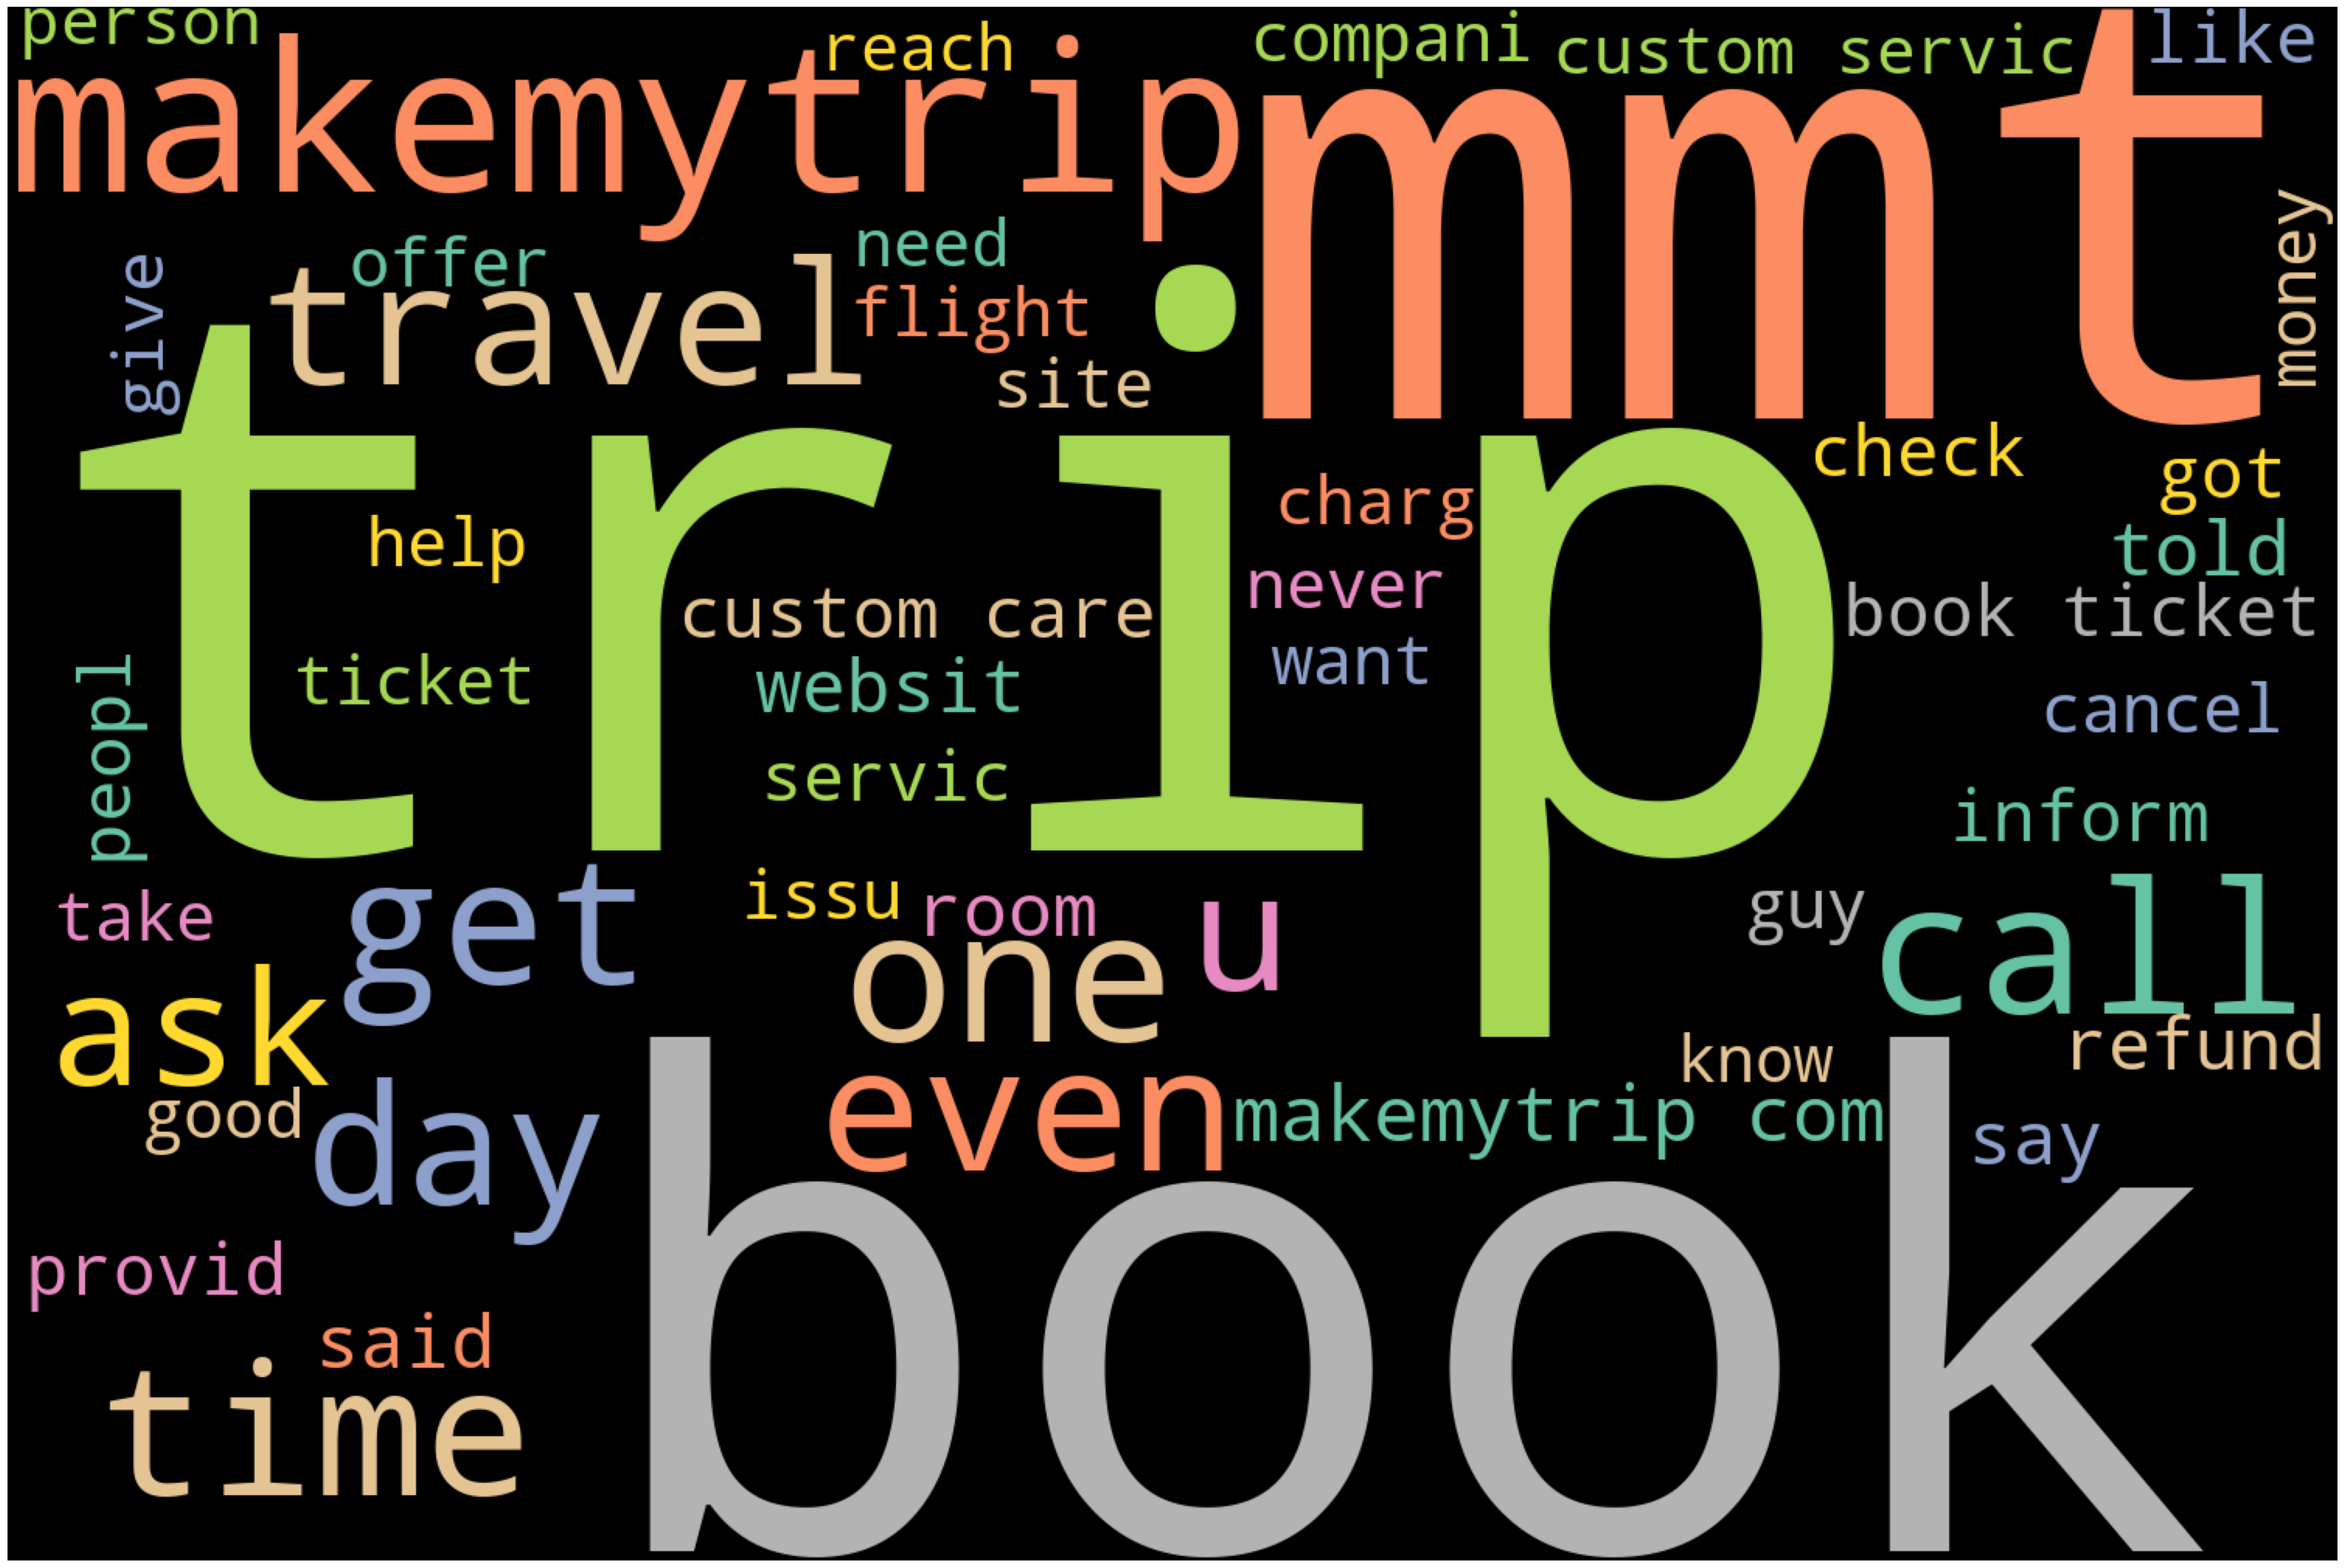

In [64]:
# Generate wordcloud
from wordcloud import WordCloud
stopwords = stop_words
stopwords.add('will')
wordcloud = WordCloud(width = 1500, height = 1000, background_color='black', max_words=50,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

## Sentimental Analysis

In [65]:
import textblob
from textblob import TextBlob

In [66]:
df1['polarity'] = round(df['Lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity),3)
df1[['Review','polarity']].head()

,Review,polarity
0,"I booked a room in Bay laurel hotel, faridabad...",-0.375
1,In trip gaurantee you will not get 3x money he...,-0.700
2,"Excellent service, value for money, better exp...",0.500
3,Till time I have not received my flight cancel...,0.000
4,"Even after 5 days of ticket cancellation, I do...",0.000


### Polarity distribution across the polarity score range (-1,1)


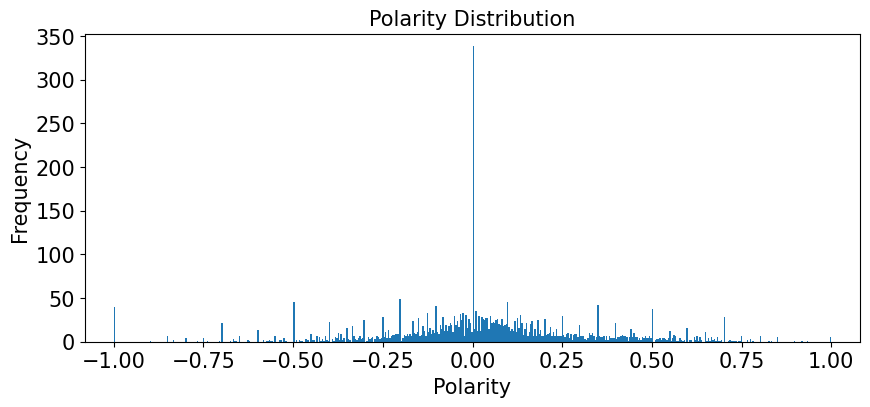

In [67]:
plt.figure(figsize=(10,4))
plt.margins(0.04)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.hist(df['polarity'], bins=500)
plt.title('Polarity Distribution', fontsize=15)
plt.show()

In [70]:
afinn = pd.read_csv(r"D:\Practice\NLP_Project-Hotel_Review\Afinn.csv", sep=',', encoding='latin-1')
print(afinn.shape)
print(afinn.head())

(2477, 2)
        word  value
0    abandon     -2
1  abandoned     -2
2   abandons     -2
3   abducted     -2
4  abduction     -2


In [71]:
affinity_scores = afinn.set_index('word')['value'].to_dict()


In [73]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/90/f0/0133b684e18932c7bf4075d94819746cee2c0329f2569db526b0fa1df1df/spacy-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd044e6f62a3d317c461f6f0c153c6573ed13025752d779e514000c15dd2/cymem-2.0.8-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for preshed<3.1.0,>=3.0.2 from https://files.pythonhosted.org/packages/e4/fc/78cdbdb79f5

In [76]:
import spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.1/12.8 MB 656.4 kB/s eta 0:00:20
     --------------------------------------- 0.1/12.8 MB 819.2 kB/s eta 0:00:16
     --------------------------------------- 0.2/12.8 MB 833.5 kB/s eta 0:00:16
      -------------------------------------- 0.2/12.8 MB 892.5 kB/s eta 0:00:15
      --------------------------------------- 0.3/12.8 MB 1.0 MB/s eta 0:00:13
      -------------------------------------- 0.3/12.8 MB 951.8 kB/s eta 0:00:14
      -------------------------------------- 0.3/12.8 MB 936.6 kB/s eta 0:00:14
     - -------------------------------------- 0.4/12.8 MB 1.0 MB/s eta 0:00:13
     - ------------------------------------- 0.4/12.8 MB 984.2 kB/s eta 0:00:13
     - ------------------------------------- 0.5/12.8 MB 973.2 kB/s eta 0:00:13
     - ------------------------------------- 0.5/12.8 MB 9

In [77]:
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [79]:
df1['sentiment_value'] = df1['Lemmatized'].apply(calculate_sentiment)
df1.tail()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value
3518,I recently booked a holiday reservation from M...,recent book holiday reserv makemytrip travel a...,"[i, recently, booked, a, holiday, reservation,...","[recently, booked, holiday, reservation, makem...",recently booked holiday reservation makemytrip...,recent book holiday reserv makemytrip travel a...,recent book holiday reserv makemytrip travel a...,recent book holiday reserv makemytrip travel a...,0.100,8
3519,It was my first visit of Somnath. I went with ...,first visit somnath went six famili member sur...,"[it, was, my, first, visit, of, somnath, i, we...","[first, visit, somnath, went, six, family, mem...",first visit somnath went six family members su...,first visit somnath went six famili member sur...,first visit somnath went six famili member sur...,first visit somnath went six famili member sur...,0.492,6
3520,In shrawan month I visited Somnath and choose ...,shrawan month visit somnath choos stay pride d...,"[in, shrawan, month, i, visited, somnath, and,...","[shrawan, month, visited, somnath, choose, sta...",shrawan month visited somnath choose stay prid...,shrawan month visit somnath choos stay pride d...,shrawan month visit somnath choos stay pride d...,shrawan month visit somnath choos stay pride d...,0.500,3
3521,It was our first trip to maldives with my fami...,first trip maldiv famili enjoy alot excel serv...,"[it, was, our, first, trip, to, maldives, with...","[first, trip, maldives, family, enjoyed, alot,...",first trip maldives family enjoyed alot excell...,first trip maldiv famili enjoy alot excel serv...,first trip maldiv famili enjoy alot excel serv...,first trip maldiv famili enjoy alot servic mak...,0.592,13
3522,I have visited Dubai 5 Days and it was awesome...,visit dubai day awesom tour realli enjoy almos...,"[i, have, visited, dubai, days, and, it, was, ...","[visited, dubai, days, awesome, tour, really, ...",visited dubai days awesome tour really enjoyed...,visit dubai day awesom tour realli enjoy almos...,visit dubai day awesom tour realli enjoy almos...,visit dubai day awesom tour enjoy almost water...,0.486,9


In [80]:
df2 = df1[['Review','polarity','sentiment_value']] #sentiment value is derived from afinn score file
df2.head()

,Review,polarity,sentiment_value
0,"I booked a room in Bay laurel hotel, faridabad...",-0.375,-6
1,In trip gaurantee you will not get 3x money he...,-0.700,-6
2,"Excellent service, value for money, better exp...",0.500,0
3,Till time I have not received my flight cancel...,0.000,-1
4,"Even after 5 days of ticket cancellation, I do...",0.000,-2


In [81]:
df['sentiment_value'].describe()

count    3523.000000
mean        0.697701
std         8.667678
min       -43.000000
25%        -4.000000
50%         0.000000
75%         5.000000
max        52.000000
Name: sentiment_value, dtype: float64

## sentiment Score Distribution

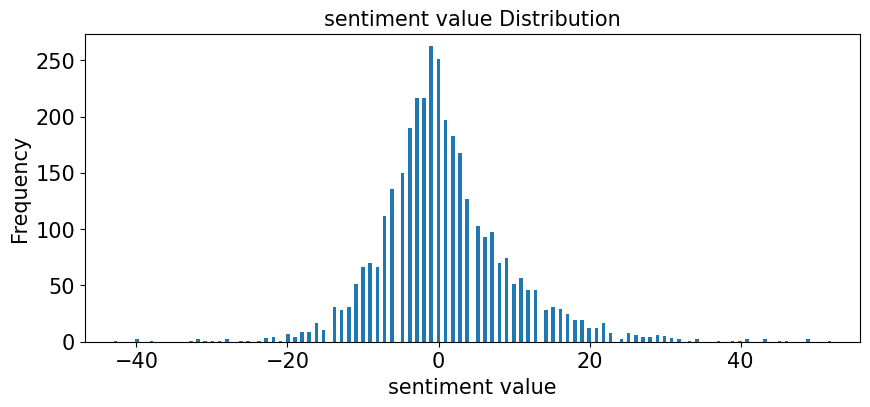

In [82]:
plt.figure(figsize=(10,4))
plt.margins(0.04)
plt.xlabel('sentiment value', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.hist(df['sentiment_value'], bins=200)
plt.title('sentiment value Distribution', fontsize=15)
plt.show()

In [83]:
df2['sentiment_value'].value_counts

<bound method IndexOpsMixin.value_counts of 0       -6
1       -6
2        0
3       -1
4       -2
        ..
3518     8
3519     6
3520     3
3521    13
3522     9
Name: sentiment_value, Length: 3523, dtype: int64>

In [84]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df2['sentiment']=df2['sentiment_value'].map(lambda x: sentiment(x))

In [85]:
df2.sample(3)

,Review,polarity,sentiment_value,sentiment
1813,Make my trip is one of the worst services for ...,-1.000,-2,negative
851,No support from customer care to cancel the ti...,-0.700,0,neutral
1769,Makemy trip.com is one of the best site online...,0.623,21,positive


In [86]:
df_neutral=df[df['sentiment_value']==0]
df_positive=df[df['sentiment_value']>0]
df_negative=df[df['sentiment_value']<0]

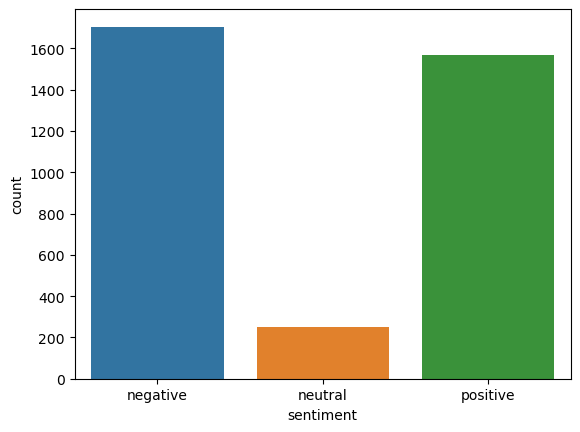

In [87]:
import seaborn as sns
sns.countplot(x='sentiment',data=df2)
plt.show()

## TFIDF vectorisation for all the classes

In [88]:
positive_reviews = df_positive['cleaned_1']
negative_reviews = df_negative['cleaned_1']
neutral_reviews = df_neutral['cleaned_1']

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(norm="l2", analyzer='word', ngram_range=(1,3), max_features=5000)
tf_idf_matrix = tv.fit_transform(positive_reviews)

# Use get_feature_names_out() instead of get_feature_names()
print(tv.get_feature_names_out())
print(tf_idf_matrix.toarray())


['abhishek' 'abl' 'abl get' ... 'yr' 'yr old' 'zero']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(negative_reviews)
print(tv.get_feature_names_out())
print(tf_idf_matrix.toarray())

['aap' 'abhishek' 'abl' ... 'zero' 'zero cancel' 'zero star']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.02166326 ... 0.         0.         0.        ]
 [0.         0.         0.01848002 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(negative_reviews)
print(tv.get_feature_names_out())
print(tf_idf_matrix.toarray())

['aap' 'abhishek' 'abl' ... 'zero' 'zero cancel' 'zero star']
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.02166326 ... 0.         0.         0.        ]
 [0.         0.         0.01848002 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


## Bi-gram for Positive reviews

In [95]:
def get_top_n2_words(corpus, n=None):
    vec1 = TfidfVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [96]:
top2_words = get_top_n2_words(df_positive['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(5)

,Bi-gram,Freq
0,makemytrip com,49.579907
1,custom care,43.621018
2,book ticket,39.106625
3,custom servic,29.346234
4,book flight,24.464141


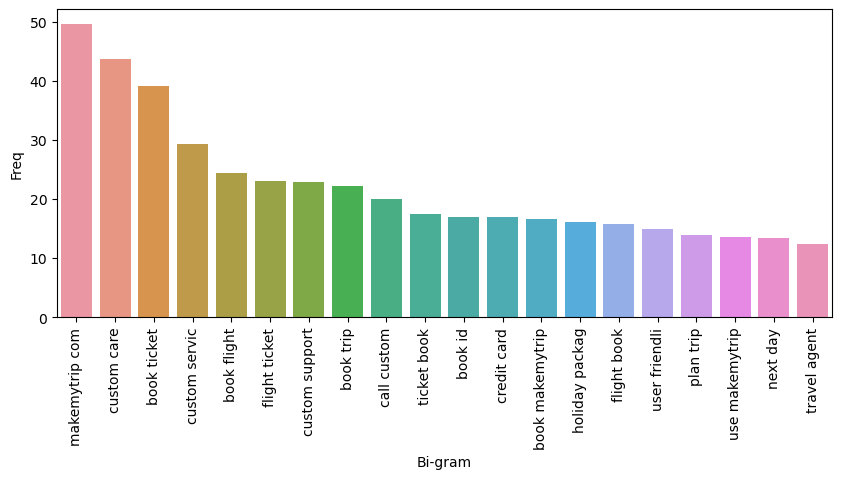

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

## Bi-gram for Negative Reviews

In [98]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
top2_words = get_top_n2_words(df_negative['cleaned_1'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(5)

,Bi-gram,Freq
0,book ticket,437
1,makemytrip com,357
2,custom care,313
3,custom servic,303
4,book id,264


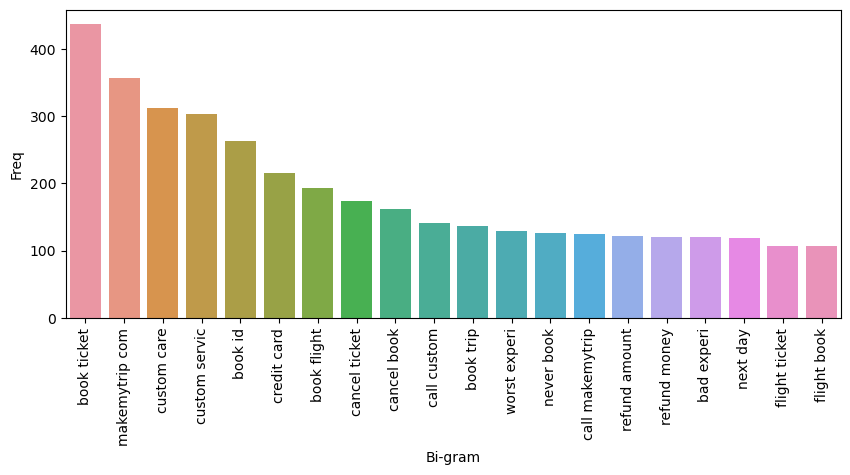

In [100]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

## Tri-gram for positive Reviews 

In [101]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [102]:
top3_words = get_top_n3_words(df_positive['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(5)

,Tri-gram,Freq
0,call custom care,104
1,book flight ticket,63
2,custom care execut,39
3,toll free number,39
4,makemytrip com book,33


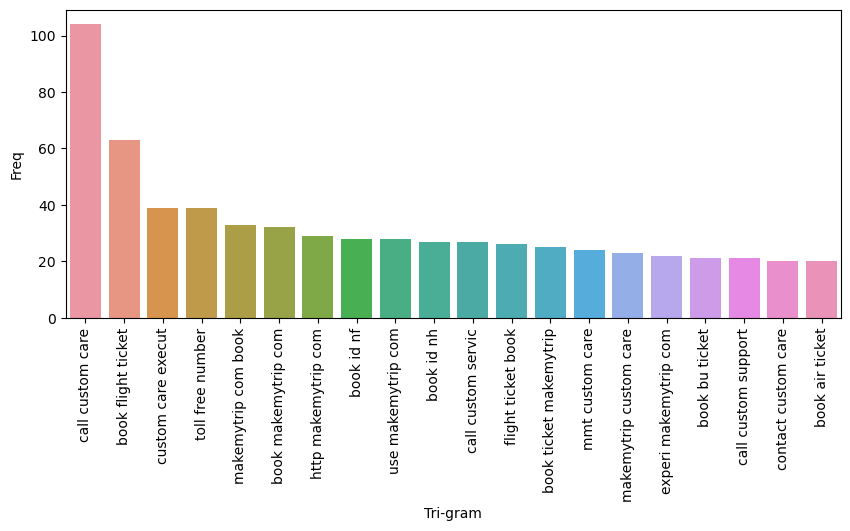

In [103]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

## Tri-gram for Negative Reviews

In [104]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [105]:
top3_words = get_top_n3_words(df_negative['cleaned_1'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df.head(5)

,Tri-gram,Freq
0,call custom care,82
1,book id nf,56
2,book flight ticket,43
3,call custom servic,42
4,book ticket makemytrip,41


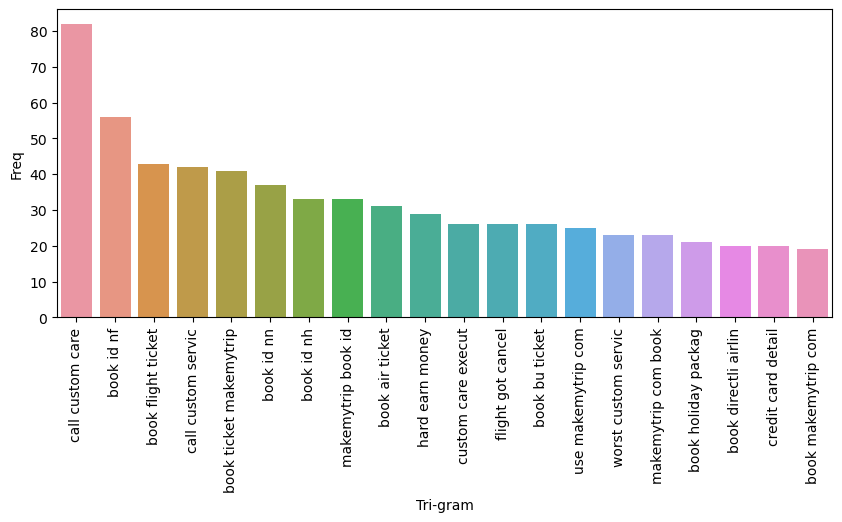

In [106]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [107]:
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value
0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...,book room bay laurel faridabad one guest south...,-0.375,-6
1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,-0.700,-6
2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...,servic valu money better experi applic one tim...,0.500,0
3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,0.000,-1
4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,0.000,-2


In [112]:
def sentiment(x):
    if x<0:
        return 'negative'
    
    elif x==0:
        return 'neutral'
    
    else:
        return 'positive'
    
df1['sentiment']=df1['sentiment_value'].map(lambda x: sentiment(x))
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...,book room bay laurel faridabad one guest south...,-0.375,-6,negative
1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,-0.700,-6,negative
2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...,servic valu money better experi applic one tim...,0.500,0,neutral
3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,0.000,-1,negative
4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,0.000,-2,negative


In [113]:
df1.to_csv("finaldataMMT.csv",index=True)
df1.head()

,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"[i, booked, a, room, in, bay, laurel, hotel, f...","[booked, room, bay, laurel, hotel, faridabad, ...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...,book room bay laurel faridabad one guest south...,-0.375,-6,negative
1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"[in, trip, gaurantee, you, will, not, get, x, ...","[trip, gaurantee, get, x, money, give, money, ...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,-0.700,-6,negative
2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"[excellent, service, value, for, money, better...","[excellent, service, value, money, better, exp...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...,servic valu money better experi applic one tim...,0.500,0,neutral
3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"[till, time, i, have, not, received, my, fligh...","[till, time, received, flight, cancellations, ...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,0.000,-1,negative
4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"[even, after, days, of, ticket, cancellation, ...","[even, days, ticket, cancellation, get, money,...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,0.000,-2,negative


In [114]:
df=pd.read_csv('finaldataMMT.csv')
df.head()

,Unnamed: 0,Review,cleaned,tokenized,stopwords_removed,joined,stemm,Lemmatized,cleaned_1,polarity,sentiment_value,sentiment
0,0,"I booked a room in Bay laurel hotel, faridabad...",book room bay laurel hotel faridabad one guest...,"['i', 'booked', 'a', 'room', 'in', 'bay', 'lau...","['booked', 'room', 'bay', 'laurel', 'hotel', '...",booked room bay laurel hotel faridabad one gue...,book room bay laurel hotel faridabad one guest...,book room bay laurel hotel faridabad one guest...,book room bay laurel faridabad one guest south...,-0.375,-6,negative
1,1,In trip gaurantee you will not get 3x money he...,trip gaurante get x money give money wallet us...,"['in', 'trip', 'gaurantee', 'you', 'will', 'no...","['trip', 'gaurantee', 'get', 'x', 'money', 'gi...",trip gaurantee get x money give money wallet u...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,trip gaurante get x money give money wallet us...,-0.700,-6,negative
2,2,"Excellent service, value for money, better exp...",excel servic valu money better experi applic o...,"['excellent', 'service', 'value', 'for', 'mone...","['excellent', 'service', 'value', 'money', 'be...",excellent service value money better experienc...,excel servic valu money better experi applic o...,excel servic valu money better experi applic o...,servic valu money better experi applic one tim...,0.500,0,neutral
3,3,Till time I have not received my flight cancel...,till time receiv flight cancel amount mislead ...,"['till', 'time', 'i', 'have', 'not', 'received...","['till', 'time', 'received', 'flight', 'cancel...",till time received flight cancellations amount...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,till time receiv flight cancel amount mislead ...,0.000,-1,negative
4,4,"Even after 5 days of ticket cancellation, I do...",even day ticket cancel get money want money to...,"['even', 'after', 'days', 'of', 'ticket', 'can...","['even', 'days', 'ticket', 'cancellation', 'ge...",even days ticket cancellation get money want m...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,even day ticket cancel get money want money to...,0.000,-2,negative
